In [15]:
import sys
sys.path.append('../data')

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon, box
import shapely
#import fiona
%matplotlib inline
import seaborn as sns
sns.set_style(style='darkgrid')

import data_processing as datpro

In [17]:
ls ../data

538_approval_polllist.csv
538_approval_topline.csv
Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv
Public_Health_Statistics-_Selected_underlying_causes_of_death_in_Chicago__2006___2010.csv
TIF_Funding_Sources_and_Uses_by_TIF__Fiscal_Year__and_Type.csv
__pycache__/
data_processing.py
dkos18.csv
pollster-ratings.csv
pollster-ratings_528csv.csv
raw-polls_528.csv
special-elections_538.csv
standardized_report.csv


In [18]:
death_df = pd.read_csv('../Data/Public_Health_Statistics-_Selected_underlying_causes_of_death_in_Chicago__2006___2010.csv'
              )

In [19]:
death_df.head()

,Cause of Death,Community Area,Community Area Name,Cumulative Deaths 2006 - 2010,Cumulative Deaths Rank,Average Annual Deaths 2006 - 2010,Average Crude Rate 2006 - 2010,Average Crude Rate Lower CI,Average Crude Rate Upper CI,Crude Rate Rank,Average Adjusted Rate 2006 - 2010,Average Adjusted Rate Lower CI,Average Adjusted Rate Upper CI,Adjusted Rate Rank,Average Annual Years of Potential Life Lost (YPLL) Rate 2006 - 2010,YPLL Rate RANK,WARNING
0,All Causes,1,Rogers Park,1741,22.0,348,614.2,585.3,643.1,51.0,895.2,852.2,939.3,29.0,7128,37.0,NaN
1,All Causes,2,West Ridge,2612,5.0,522,723.6,695.8,751.4,42.0,689.9,663.3,717.1,58.0,6123,49.0,NaN
2,All Causes,3,Uptown,2542,6.0,508,879.6,845.4,913.8,31.0,934.0,897.5,971.2,24.0,9147,31.0,NaN
3,All Causes,4,Lincoln Square,1108,40.0,222,547.0,514.8,579.2,60.0,698.7,657.4,741.3,53.0,5344,62.0,NaN
4,All Causes,5,North Center,690,59.0,138,433.0,400.7,465.3,68.0,681.2,630.1,734.3,61.0,4058,74.0,NaN


In [46]:
death_df.tail()

,Cause of Death,Community Area,Community Area Name,Cumulative Deaths 2006 - 2010,Cumulative Deaths Rank,Average Annual Deaths 2006 - 2010,Average Crude Rate 2006 - 2010,Average Crude Rate Lower CI,Average Crude Rate Upper CI,Crude Rate Rank,Average Adjusted Rate 2006 - 2010,Average Adjusted Rate Lower CI,Average Adjusted Rate Upper CI,Adjusted Rate Rank,Average Annual Years of Potential Life Lost (YPLL) Rate 2006 - 2010,YPLL Rate RANK,WARNING
1399,Suicide (intentional self-harm),74,Mount Greenwood,6,51.0,1,6.3,2.3,13.7,37.0,6.4,2.3,12.5,38.0,181,43.0,"Rate, confidence interval, and YPLL estimates ..."
1400,Suicide (intentional self-harm),75,Morgan Park,4,61.0,1,3.5,1.0,9.0,65.0,3.9,1.1,8.6,62.0,175,47.0,"Rate, confidence interval, and YPLL estimates ..."
1401,Suicide (intentional self-harm),76,O'Hare,8,40.0,2,12.7,5.5,25.0,1.0,13.3,5.6,24.1,2.0,349,7.0,"Rate, confidence interval, and YPLL estimates ..."
1402,Suicide (intentional self-harm),77,Edgewater,32,4.0,6,11.1,7.6,15.7,7.0,10.1,6.9,13.9,9.0,332,11.0,NaN
1403,Suicide (intentional self-harm),0,Chicago,886,NaN,177,6.5,6.1,6.9,NaN,6.5,6.1,6.9,NaN,211,NaN,NaN


In [32]:
death_df.shape

(1404, 17)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

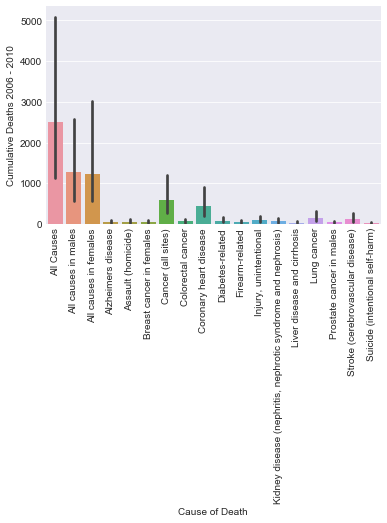

In [28]:
sns.categorical.barplot(data=death_df, x='Cause of Death', y='Cumulative Deaths 2006 - 2010')
plt.xticks(rotation=90)

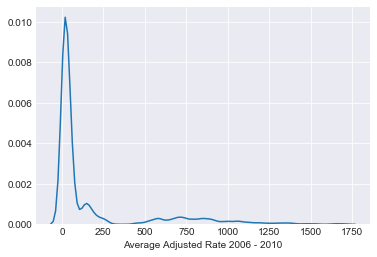

In [31]:
sns.distplot(death_df['Average Adjusted Rate 2006 - 2010'], hist=False)

In [34]:
grouped = death_df.groupby('Cause of Death')

In [54]:
no_chicago = death_df[death_df['Cause of Death']=='Suicide (intentional self-harm)']
no_chicago = no_chicago[no_chicago['Community Area Name']!='Chicago']

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76]),
 <a list of 77 Text xticklabel objects>)

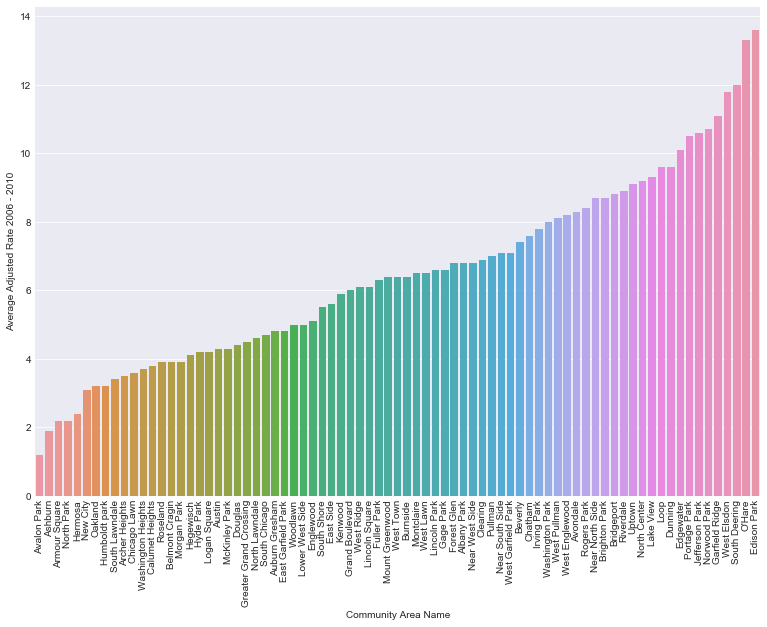

In [64]:
sns.barplot(data=no_chicago.sort_values(by='Average Adjusted Rate 2006 - 2010'), 
        x='Community Area Name',
        y='Average Adjusted Rate 2006 - 2010',
        color=None
    )
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(13, 9)
plt.xticks(rotation=90)